In [2]:
!pip install feature-engine


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from feature_engine.creation import CyclicalFeatures

In [4]:
import yfinance as yf

# Define the ticker symbol for Nifty 50
nifty_50_ticker = "^NSEI"

# Fetch the hourly data
nifty_50_data = yf.download(tickers=nifty_50_ticker, period='7d', interval='1h')

# Display the data
print(nifty_50_data)


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['^NSEI']: YFInvalidPeriodError("%ticker%: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []


In [5]:
import yfinance as yf
import pandas as pd

# Fetch Nifty 50 index data
nifty50 = yf.Ticker("^NSEI")

# Get the historical data for Nifty 50 with 1-hour interval for last 2 years
nifty50_hourly = nifty50.history(period="2y", interval="1h")


df= pd.DataFrame(nifty50_hourly)

# Display the hourly data
data=df.drop(["Volume","Dividends","Stock Splits"],axis=1)

In [6]:
data.head()

,Open,High,Low,Close
Datetime,,,,
2022-07-13 09:15:00+05:30,16128.200195,16139.849609,16103.049805,16129.250000
2022-07-13 10:15:00+05:30,16129.000000,16131.549805,16056.799805,16077.500000
2022-07-13 11:15:00+05:30,16077.450195,16102.700195,16066.099609,16084.950195
2022-07-13 12:15:00+05:30,16084.900391,16094.799805,15990.150391,16001.750000
2022-07-13 13:15:00+05:30,16001.900391,16008.849609,15968.500000,15981.799805


In [7]:
data.shape

(3438, 4)

In [8]:
# Cast datetime variable in datetime format.

data.index = pd.to_datetime(data.index)

data.index

DatetimeIndex(['2022-07-13 09:15:00+05:30', '2022-07-13 10:15:00+05:30',
               '2022-07-13 11:15:00+05:30', '2022-07-13 12:15:00+05:30',
               '2022-07-13 13:15:00+05:30', '2022-07-13 14:15:00+05:30',
               '2022-07-13 15:15:00+05:30', '2022-07-14 09:15:00+05:30',
               '2022-07-14 10:15:00+05:30', '2022-07-14 11:15:00+05:30',
               ...
               '2024-07-11 13:15:00+05:30', '2024-07-11 14:15:00+05:30',
               '2024-07-11 15:15:00+05:30', '2024-07-12 09:15:00+05:30',
               '2024-07-12 10:15:00+05:30', '2024-07-12 11:15:00+05:30',
               '2024-07-12 12:15:00+05:30', '2024-07-12 13:15:00+05:30',
               '2024-07-12 14:15:00+05:30', '2024-07-12 15:15:00+05:30'],
              dtype='datetime64[ns, Asia/Kolkata]', name='Datetime', length=3438, freq=None)

In [9]:

# Sanity check: data span.

data.index.min(), data.index.max()

(Timestamp('2022-07-13 09:15:00+0530', tz='Asia/Kolkata'),
 Timestamp('2024-07-12 15:15:00+0530', tz='Asia/Kolkata'))

In [10]:
# Quick check: missing data.

data.isnull().sum()

Open     0
High     0
Low      0
Close    0
dtype: int64

#### Quick analysis - plot time series


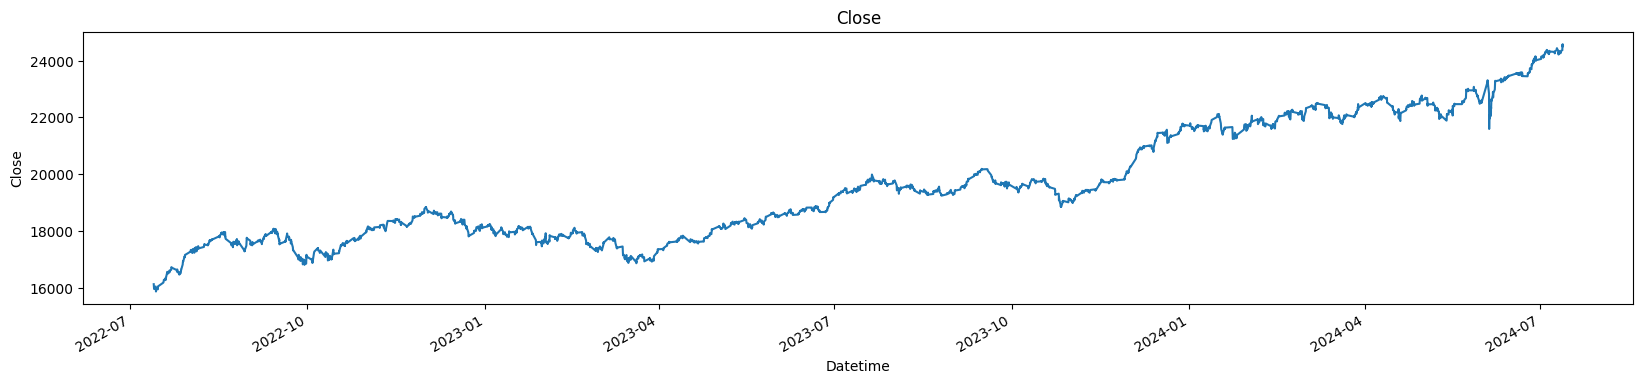

In [11]:
#Plot the data

for var in ["Close"]:
    data[var].plot(figsize=(20,4))

    # Add title
    plt.title(var)

    # the y axis label
    plt.ylabel(var)

    plt.show()

#### Highlight missing timestamps
To highlight the missing timestamps, I will first introduce the missing timestamps in the dataset. This will introduce NaN into the variables.

Then I will fill in the NAN, carrying the last value forward. And finally, I will plot the imputed data to highlight the missing timestamps.

In [12]:
# Introduce the missing timestamps.
# Note that we capture this in a different dataframe.
data_ = data.asfreq("1H")
data_.head()



/tmp/ipykernel_79410/2784850117.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data_ = data.asfreq("1H")


,Open,High,Low,Close
Datetime,,,,
2022-07-13 09:15:00+05:30,16128.200195,16139.849609,16103.049805,16129.250000
2022-07-13 10:15:00+05:30,16129.000000,16131.549805,16056.799805,16077.500000
2022-07-13 11:15:00+05:30,16077.450195,16102.700195,16066.099609,16084.950195
2022-07-13 12:15:00+05:30,16084.900391,16094.799805,15990.150391,16001.750000
2022-07-13 13:15:00+05:30,16001.900391,16008.849609,15968.500000,15981.799805


In [13]:
# Apply the forward fill method.
data_imputed = data_.fillna(method="ffill")
data_imputed

/tmp/ipykernel_79410/4017437292.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_imputed = data_.fillna(method="ffill")


,Open,High,Low,Close
Datetime,,,,
2022-07-13 09:15:00+05:30,16128.200195,16139.849609,16103.049805,16129.250000
2022-07-13 10:15:00+05:30,16129.000000,16131.549805,16056.799805,16077.500000
2022-07-13 11:15:00+05:30,16077.450195,16102.700195,16066.099609,16084.950195
2022-07-13 12:15:00+05:30,16084.900391,16094.799805,15990.150391,16001.750000
2022-07-13 13:15:00+05:30,16001.900391,16008.849609,15968.500000,15981.799805
...,...,...,...,...
2024-07-12 11:15:00+05:30,24537.650391,24539.349609,24473.300781,24516.400391
2024-07-12 12:15:00+05:30,24517.800781,24523.449219,24478.250000,24518.500000
2024-07-12 13:15:00+05:30,24518.449219,24579.800781,24514.050781,24574.650391


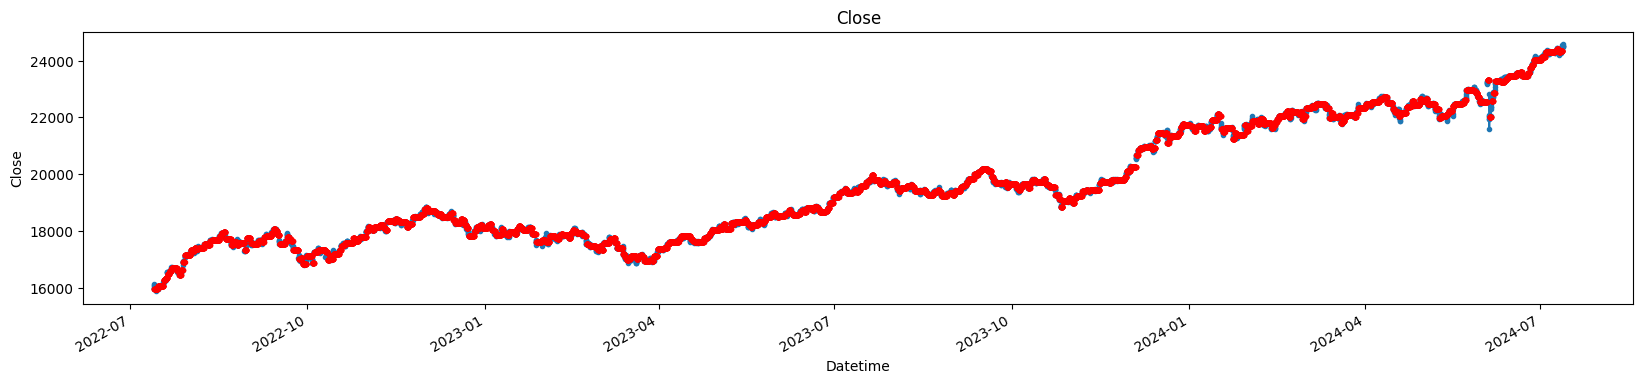

In [14]:
# Plot the imputed time series.
for var in ["Close"]:

    # plot the time series.
    ax = data_[var].plot(linestyle="-", marker=".", figsize=[20, 4])

    # plot the imputed values on top, in red.
    data_imputed[data_.isnull()][var].plot(ax=ax, legend=None, marker=".", color="r")

    # Add title.
    plt.title(var)

    # the y axis label
    plt.ylabel(var)

    plt.show()

In [15]:
data= data_imputed.copy()

# Sanity: sort index.
data.sort_index(inplace=True)

### Feature Engineering :

1) These are features that capture information from the timestamp.



In [16]:
# Extract date and time features.

data["Month"] = data.index.month
data["Week"] = data.index.isocalendar().week
data["Day"] = data.index.day
data["Day_of_week"] = data.index.day_of_week
data["Hour"] = data.index.hour

# # find out if it is a weekend.
# data["is_weekend"] = np.where(data["Day_of_week"]>4, 1, 0)

In [17]:
data.head(20)

,Open,High,Low,Close,Month,Week,Day,Day_of_week,Hour
Datetime,,,,,,,,,
2022-07-13 09:15:00+05:30,16128.200195,16139.849609,16103.049805,16129.250000,7,28,13,2,9
2022-07-13 10:15:00+05:30,16129.000000,16131.549805,16056.799805,16077.500000,7,28,13,2,10
2022-07-13 11:15:00+05:30,16077.450195,16102.700195,16066.099609,16084.950195,7,28,13,2,11
2022-07-13 12:15:00+05:30,16084.900391,16094.799805,15990.150391,16001.750000,7,28,13,2,12
2022-07-13 13:15:00+05:30,16001.900391,16008.849609,15968.500000,15981.799805,7,28,13,2,13
2022-07-13 14:15:00+05:30,15981.650391,16007.549805,15950.549805,15959.799805,7,28,13,2,14
2022-07-13 15:15:00+05:30,15959.750000,15982.299805,15955.950195,15975.750000,7,28,13,2,15
2022-07-13 16:15:00+05:30,15959.750000,15982.299805,15955.950195,15975.750000,7,28,13,2,16
2022-07-13 17:15:00+05:30,15959.750000,15982.299805,15955.950195,15975.750000,7,28,13,2,17


In [18]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

#### Lag features
#Lets create 1Hr Lag , 2Hr Lag 4hr 8hr lag for the feature

In [19]:
# #Lets create 1Hr Lag , 2Hr Lag 4hr 8hr lag for the feature
# # raw time series
# variables = ['Open', 'High', 'Low', 'Close']
# # Shift the data forward 1 Hr.
# tmp = data[variables].shift(freq="1H")

# # Names for the new variables.
# tmp.columns = [v + "_lag_1" for v in variables]

# # Add the variables to the original data.
# print("data size before")
# print(data.shape)

# #Add
# data=data.merge(tmp,left_index=True, right_index=True, how="left")
# print("data size after")
# print(data.shape)

# data.head(20)

In [20]:
# # In this procedure, we introduced missing
# # data whenever there was no data available in
# # the previous hour.

# data.isnull().sum()

In [21]:
# Now we repeat the exercise, but this time
# the values are moved forward 24 hours.
freqs=["1H","2H","4H","8H","24H"]
variables = ['Open', 'High', 'Low', 'Close']
for freq in freqs: 
    # Move forward n hrs.
    tmp = data[variables].shift(freq=freq)

    # Rename the variables.
    tmp.columns = [v + f"_lag_{freq}" for v in variables]

    # Add the features to the original data.
    print("data size before")
    print(data.shape)

    data = data.merge(tmp, left_index=True, right_index=True, how="left")

# print("data size after")
# print(data.shape)

# data[["CO_sensor", "CO_sensor_lag_24"]].head(25)



data size before
(17527, 9)
data size before
(17527, 13)
data size before
(17527, 17)
data size before
(17527, 21)
data size before
(17527, 25)


/tmp/ipykernel_79410/2843008362.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  tmp = data[variables].shift(freq=freq)
/tmp/ipykernel_79410/2843008362.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  tmp = data[variables].shift(freq=freq)
/tmp/ipykernel_79410/2843008362.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  tmp = data[variables].shift(freq=freq)
/tmp/ipykernel_79410/2843008362.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  tmp = data[variables].shift(freq=freq)
/tmp/ipykernel_79410/2843008362.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  tmp = data[variables].shift(freq=freq)


In [22]:
data.head()

,Open,High,Low,Close,Month,Week,Day,Day_of_week,Hour,Open_lag_1H,...,Low_lag_4H,Close_lag_4H,Open_lag_8H,High_lag_8H,Low_lag_8H,Close_lag_8H,Open_lag_24H,High_lag_24H,Low_lag_24H,Close_lag_24H
Datetime,,,,,,,,,,,,,,,,,,,,,
2022-07-13 09:15:00+05:30,16128.200195,16139.849609,16103.049805,16129.250000,7,28,13,2,9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-13 10:15:00+05:30,16129.000000,16131.549805,16056.799805,16077.500000,7,28,13,2,10,16128.200195,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-13 11:15:00+05:30,16077.450195,16102.700195,16066.099609,16084.950195,7,28,13,2,11,16129.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-13 12:15:00+05:30,16084.900391,16094.799805,15990.150391,16001.750000,7,28,13,2,12,16077.450195,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-13 13:15:00+05:30,16001.900391,16008.849609,15968.500000,15981.799805,7,28,13,2,13,16084.900391,...,16103.049805,16129.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Month', 'Week', 'Day', 'Day_of_week',
       'Hour', 'Open_lag_1H', 'High_lag_1H', 'Low_lag_1H', 'Close_lag_1H',
       'Open_lag_2H', 'High_lag_2H', 'Low_lag_2H', 'Close_lag_2H',
       'Open_lag_4H', 'High_lag_4H', 'Low_lag_4H', 'Close_lag_4H',
       'Open_lag_8H', 'High_lag_8H', 'Low_lag_8H', 'Close_lag_8H',
       'Open_lag_24H', 'High_lag_24H', 'Low_lag_24H', 'Close_lag_24H'],
      dtype='object')

In [24]:
# In this procedure, we introduced missing
# data whenever there was no data available in
# the previous 24 hours.

data.isnull().sum()

Open              0
High              0
Low               0
Close             0
Month             0
Week              0
Day               0
Day_of_week       0
Hour              0
Open_lag_1H       1
High_lag_1H       1
Low_lag_1H        1
Close_lag_1H      1
Open_lag_2H       2
High_lag_2H       2
Low_lag_2H        2
Close_lag_2H      2
Open_lag_4H       4
High_lag_4H       4
Low_lag_4H        4
Close_lag_4H      4
Open_lag_8H       8
High_lag_8H       8
Low_lag_8H        8
Close_lag_8H      8
Open_lag_24H     24
High_lag_24H     24
Low_lag_24H      24
Close_lag_24H    24
dtype: int64

### Window features


For now , I will take the average of the previous 3 values of the TS to predict the current value. 

We first need to calculate the average of the 3 previous values, and then move that value forward.

In [25]:
# Use the mean of the 3 previous hours as input variables.
tmp=(
    data[variables]
    .rolling(window="3H")
    .mean() # Average the last 3 hr values.
    .shift(freq="1H")# Move the average 1 hour forward
)
# Rename the columns
tmp.columns = [v + "_window_3H" for v in variables]

# view of the result
tmp.head(10)

/tmp/ipykernel_79410/99698076.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data[variables]


,Open_window_3H,High_window_3H,Low_window_3H,Close_window_3H
Datetime,,,,
2022-07-13 10:15:00+05:30,16128.200195,16139.849609,16103.049805,16129.250000
2022-07-13 11:15:00+05:30,16128.600098,16135.699707,16079.924805,16103.375000
2022-07-13 12:15:00+05:30,16111.550130,16124.699870,16075.316406,16097.233398
2022-07-13 13:15:00+05:30,16097.116862,16109.683268,16037.683268,16054.733398
2022-07-13 14:15:00+05:30,16054.750326,16068.783203,16008.250000,16022.833333
2022-07-13 15:15:00+05:30,16022.817057,16037.066406,15969.733398,15981.116536
2022-07-13 16:15:00+05:30,15981.100260,15999.566406,15958.333333,15972.449870
2022-07-13 17:15:00+05:30,15967.050130,15990.716471,15954.150065,15970.433268
2022-07-13 18:15:00+05:30,15959.750000,15982.299805,15955.950195,15975.750000


In [26]:
# Join the new variables to the original data.
print("data size before")
print(data.shape)

data = data.merge(tmp, left_index=True, right_index=True, how="left")

print("data size after")
print(data.shape)

data.head()

data size before
(17527, 29)
data size after
(17527, 33)


,Open,High,Low,Close,Month,Week,Day,Day_of_week,Hour,Open_lag_1H,...,Low_lag_8H,Close_lag_8H,Open_lag_24H,High_lag_24H,Low_lag_24H,Close_lag_24H,Open_window_3H,High_window_3H,Low_window_3H,Close_window_3H
Datetime,,,,,,,,,,,,,,,,,,,,,
2022-07-13 09:15:00+05:30,16128.200195,16139.849609,16103.049805,16129.250000,7,28,13,2,9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-13 10:15:00+05:30,16129.000000,16131.549805,16056.799805,16077.500000,7,28,13,2,10,16128.200195,...,NaN,NaN,NaN,NaN,NaN,NaN,16128.200195,16139.849609,16103.049805,16129.250000
2022-07-13 11:15:00+05:30,16077.450195,16102.700195,16066.099609,16084.950195,7,28,13,2,11,16129.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,16128.600098,16135.699707,16079.924805,16103.375000
2022-07-13 12:15:00+05:30,16084.900391,16094.799805,15990.150391,16001.750000,7,28,13,2,12,16077.450195,...,NaN,NaN,NaN,NaN,NaN,NaN,16111.550130,16124.699870,16075.316406,16097.233398
2022-07-13 13:15:00+05:30,16001.900391,16008.849609,15968.500000,15981.799805,7,28,13,2,13,16084.900391,...,NaN,NaN,NaN,NaN,NaN,NaN,16097.116862,16109.683268,16037.683268,16054.733398


### Periodic features

Some features are periodic. For example, hours, months, and days.

We can encode those periodic features using a sine and cosine transformation with the feature's period. This will cause the values of the features that are far apart to come closer. For example, December (12) is closer to January (1) than June (6). This relationship is not captured by the numerical representation of these features. But we could change it, if we transformed these variables with sine and cosine.

We will discuss this technique later on in the course. For now, let's create these features automatically with the open source library Feature-engine.


In [27]:
# Create features that capture the cyclical representation.

cyclical = CyclicalFeatures(
    variables=["Month", "Hour"],  # The features we want to transform.
    drop_original=False,  # Whether to drop the original features.
)

data = cyclical.fit_transform(data)

In [28]:
cyclical_vars = [var for var in data.columns if "sin" in var or "cos" in var]

data[cyclical_vars].head()

,Month_sin,Month_cos,Hour_sin,Hour_cos
Datetime,,,,
2022-07-13 09:15:00+05:30,-0.5,-0.866025,0.631088,-0.775711
2022-07-13 10:15:00+05:30,-0.5,-0.866025,0.398401,-0.917211
2022-07-13 11:15:00+05:30,-0.5,-0.866025,0.136167,-0.990686
2022-07-13 12:15:00+05:30,-0.5,-0.866025,-0.136167,-0.990686
2022-07-13 13:15:00+05:30,-0.5,-0.866025,-0.398401,-0.917211


#### Dropping Missing Data -When creating lag and window features, we introduced missing data.



In [29]:

# Determine fraction of missing data.

data.isnull().sum() / len(data)

Open               0.000000
High               0.000000
Low                0.000000
Close              0.000000
Month              0.000000
Week               0.000000
Day                0.000000
Day_of_week        0.000000
Hour               0.000000
Open_lag_1H        0.000057
High_lag_1H        0.000057
Low_lag_1H         0.000057
Close_lag_1H       0.000057
Open_lag_2H        0.000114
High_lag_2H        0.000114
Low_lag_2H         0.000114
Close_lag_2H       0.000114
Open_lag_4H        0.000228
High_lag_4H        0.000228
Low_lag_4H         0.000228
Close_lag_4H       0.000228
Open_lag_8H        0.000456
High_lag_8H        0.000456
Low_lag_8H         0.000456
Close_lag_8H       0.000456
Open_lag_24H       0.001369
High_lag_24H       0.001369
Low_lag_24H        0.001369
Close_lag_24H      0.001369
Open_window_3H     0.000057
High_window_3H     0.000057
Low_window_3H      0.000057
Close_window_3H    0.000057
Month_sin          0.000000
Month_cos          0.000000
Hour_sin           0

#### Imputation
There is not a lot of data missing, so I will just remove those observations.




In [30]:
print("data size before")
print(data.shape)

data.dropna(inplace=True)

print("data size after")
print(data.shape)

data size before
(17527, 37)
data size after
(17503, 37)


In [31]:
data.head()

,Open,High,Low,Close,Month,Week,Day,Day_of_week,Hour,Open_lag_1H,...,Low_lag_24H,Close_lag_24H,Open_window_3H,High_window_3H,Low_window_3H,Close_window_3H,Month_sin,Month_cos,Hour_sin,Hour_cos
Datetime,,,,,,,,,,,,,,,,,,,,,
2022-07-14 09:15:00+05:30,16018.849609,16070.500000,15995.150391,16048.500000,7,28,14,3,9,15959.750000,...,16103.049805,16129.250000,15959.750000,15982.299805,15955.950195,15975.750000,-0.5,-0.866025,0.631088,-0.775711
2022-07-14 10:15:00+05:30,16049.150391,16052.700195,16003.400391,16005.650391,7,28,14,3,10,16018.849609,...,16056.799805,16077.500000,15979.449870,16011.699870,15969.016927,16000.000000,-0.5,-0.866025,0.398401,-0.917211
2022-07-14 11:15:00+05:30,16005.950195,16005.950195,15937.799805,15956.700195,7,28,14,3,11,16049.150391,...,16066.099609,16084.950195,16009.250000,16035.166667,15984.833659,16009.966797,-0.5,-0.866025,0.136167,-0.990686
2022-07-14 12:15:00+05:30,15957.450195,16002.150391,15942.700195,15972.450195,7,28,14,3,12,16005.950195,...,15990.150391,16001.750000,16024.650065,16043.050130,15978.783529,16003.616862,-0.5,-0.866025,-0.136167,-0.990686
2022-07-14 13:15:00+05:30,15972.299805,15972.299805,15871.750000,15872.299805,7,28,14,3,13,15957.450195,...,15968.500000,15981.799805,16004.183594,16020.266927,15961.300130,15978.266927,-0.5,-0.866025,-0.398401,-0.917211


Found existing installation: pandas 2.2.2
Uninstalling pandas-2.2.2:
  Would remove:
    /system/conda/miniconda3/envs/cloudspace/lib/python3.10/site-packages/pandas-2.2.2.dist-info/*
    /system/conda/miniconda3/envs/cloudspace/lib/python3.10/site-packages/pandas/*
Proceed (Y/n)? ^C
ERROR: Operation cancelled by user


In [33]:
# store new dataset

# data.to_csv("01_data_Nifty50_preprocessed.csv", index=True)

import csv
def save_dataframe_with_index(df, filename):
    with open(filename, 'w', newline='') as file:
        writer = csv.writer(file)
        
        # Write the header (including index name if it exists)
        header = [df.index.name if df.index.name else 'index'] + list(df.columns)
        writer.writerow(header)
        
        # Write the data
        for row in df.itertuples():
            writer.writerow(row)

# Usage
save_dataframe_with_index(data, '01_data_Nifty50_preprocessed.csv')